In [28]:
import numpy as np
import pandas as pd
import os
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [3]:
DATA_IN_PATH= './data_in/'

In [26]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings.txt',header =0, delimiter = '\t', quoting =3)
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


# 데이터프레임의 apply 함수로 데이터에대한 기뷰 길이 확인


In [27]:
train_lenght = train_data['document'].astype(str).apply(len)

In [8]:
train_review = [review for review in train_data['document'] if type(review) is str]

In [10]:
wordcloud = WordCloud(font_path=DATA_IN_PATH + 'tvN 즐거운이야기 Medium.ttf').generate(''.join(train_review))

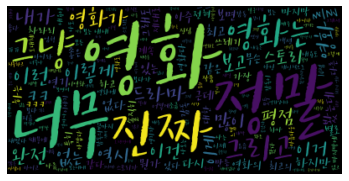

In [11]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 데이터 전처리


In [29]:
train_Data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter ='\t', quoting=3)

In [30]:
train_data['document'][:5]

0                                  어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1    디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...
2                 폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.
3    와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...
4                          안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.
Name: document, dtype: object

In [36]:
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]","",train_data['document'][0])

In [59]:
review_text

['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ']

In [66]:
okt = Okt()
review_text=okt.morphs(review_text,stem=True)
print(review_text)

TypeError: No matching overloads found for kr.lucypark.okt.OktInterface.tokenize(list,java.lang.Boolean,java.lang.Boolean), options are:
	public java.util.List kr.lucypark.okt.OktInterface.tokenize(java.lang.String,java.lang.Boolean,java.lang.Boolean)



In [61]:
def preprocessing(review, okt, remove_stopwords, stop_words=[]):
    #함수의 인자는
    #review : 전처리할 텍스트
    #okt : okt객체를 반복적으로 생성하지 않구 미리 만들어 인자로 받음
    #remove_stopword : 불용어를 제거할지 여부 선택
    
    #1.한글 및 공백 제외한 문자 모두 제거
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]","",review)
    
    #2. okt 객체를 활용해 형태소 단위로 나눈다.
    word_review = okt.morphs(review_text, stem= True)
    
    if remove_stopwords:
        #불용어 제거 (선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
        
    return word_review

# okt객체를 생성하고 불용어 사전을 정의한 후 함수 실행

In [62]:
stop_words= ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt=Okt()
clean_train_review = []


In [63]:
for review in train_data ['document']:
    #비어 있는 데이터에서 멈추지 않도록 문자열인 경우만 진행
    if type(review)==str:
        clean_train_review.append(preprocessing(review,okt,True,stop_words))
    else :
        clean_train_Review.append([]) #string이 아니면 비어있는 값 추가

NameError: name 'clean_train_Review' is not defined

In [ ]:
clean_train_review[:4]

In [ ]:
test_data = pd.read_csv(DATA_IN_PATH+'ratings_test.txt', header=0, delimiter='\t', quoting=3)

clean_test_review=[]

for review in train_data ['document']:
    #비어 있는 데이터에서 멈추지 않도록 문자열인 경우만 진행
    if type(review)==str:
        clean_test_review.append(preprocessing(review,okt,True,stop_words))
    else :
        clean_test_Review.append([]) #string이 아니면 비어있는 값 추가
        
clean_test_review[:4]